In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.colors import LogNorm


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 12,
})
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 18})


### Functions

In [4]:
def create_log_palette(n_colors, name):
    # Define the logarithmic scale
    log_scale = np.geomspace(1e-3, 1e-1, num=n_colors)

    # Create the palette using the logarithmic scale
    palette = sns.color_palette(name, n_colors)
    
    for i in range(n_colors):
        r, g, b = palette[i]
        palette[i] = (r, g, b)
    
    return palette

def plot_force(name, df):
    # Create the palette with logarithmic scale
    palette = create_log_palette(3, 'flare')
    # palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)
    fig = plt.figure()
    ax = sns.scatterplot(data=df, x='Radius ($mm$)', y='Force ($N$)',
                        hue='MFRi ($g.s^{-1}$)',
                        style='Slit Width ($mm$)',
                        legend=True,
                        palette=palette, 
                        # vmin=1e-3, vmax=1e-1
                        norm=LogNorm(),
                        )
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.yscale('log')
    plt.show()
    fig.savefig(f'{name}_Force.png', format='png', dpi=300, bbox_inches = 'tight')
    
def plot_dr(name, df, mfri):
    palette = create_log_palette(5, 'viridis')

    for i in mfri:
        fig = plt.figure()
        
        ax = sns.scatterplot(data=df[df['MFRi ($g.s^{-1}$)'] == i], 
                            x='Radius ($mm$)',
                            y='Discharge Ratio',
                            hue='Slit Width ($mm$)',
                            style='Slit Width ($mm$)',
                            palette=palette, 
                            # vmin=1e-3, vmax=1e-1
                            norm=LogNorm(),
                            )
        # sns.move_legend(ax, "lower right")
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))        
        plt.show()
        fig.savefig(f'{name}_dischargeRatio_{i}.png', format='png', dpi=300, bbox_inches = 'tight')
        
def plot_simple(name,
                df,
                x,
                y,
                n,
                palette,
                hue = 'Slit Width ($mm$)',
                style = 'Slit Width ($mm$)',
                log = False
                ):
    palette = create_log_palette(n, palette)

    fig = plt.figure()
    
    ax = sns.scatterplot(data=df, 
                        x=x,
                        y=y,
                        hue=hue,
                        style=style,
                        palette=palette, 
                        # vmin=1e-3, vmax=1e-1
                        )
    sns.move_legend(ax, "lower right")
    if log:
        plt.yscale('log')
    plt.show()
    fig.savefig(f'{name}.png', format='png', dpi=300, bbox_inches = 'tight')

### Convergence

In [171]:
conv = pd.read_csv('./convergence.csv', sep=';', decimal=',')
conv['discharge_ratio']=np.abs(conv['MFR_sortie']/conv['MFR_buse'])
conv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mass_flow_inlet         42 non-null     float64
 1   OutLetStartThickness    42 non-null     float64
 2   Radius                  42 non-null     int64  
 3   SlitOut                 42 non-null     float64
 4   SlitIn                  42 non-null     float64
 5   SlitPosition            42 non-null     int64  
 6   Slit_ecarteur           42 non-null     int64  
 7   paroi Element Size      42 non-null     float64
 8   interieur Element Size  42 non-null     float64
 9   centre Element Size     42 non-null     float64
 10  autour Element Size     42 non-null     float64
 11  Force                   42 non-null     float64
 12  vmoy-centre-op          42 non-null     float64
 13  vmoy-sortie-op          42 non-null     float64
 14  Static_P_Max            42 non-null     floa

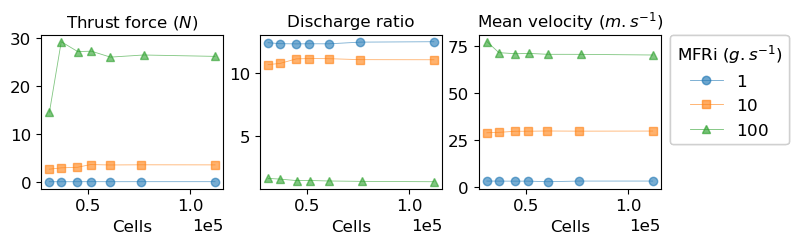

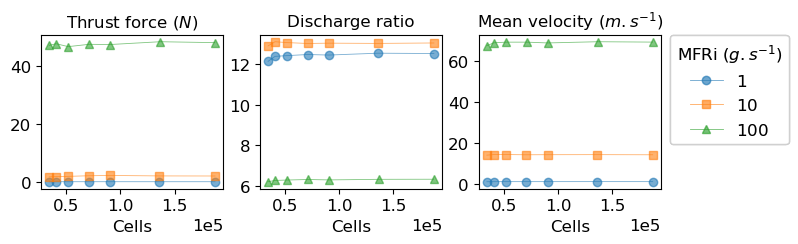

In [172]:
# Plotting the convergence of the discharge ratio, force and vmoy-sortie-op for the 3 MFR using subplots in matplotlib

plt.rcParams.update({'font.size': 12})

mfr = [1,10,100]

markers=['o', 's', '^']

subtitle=['Thrust force ($N$)', 'Discharge ratio', 'Mean velocity ($m.s^{-1}$)']
for idy, c in enumerate([12,30]):
    fig, ax =plt.subplots(1,3, figsize=(8,2))
    fig.subplots_adjust(hspace=10)
    for idx, d in enumerate(['Force', 'discharge_ratio', 'vmoy-sortie-op']):
        val_max = 0
        val_min = 0
        val_conv = 0
        for idz, m in enumerate([0.001, 0.01, 0.1]):
            y = conv[(conv['Radius'] == c) & (conv['mass_flow_inlet'] == m)][d].values
            x = conv[(conv['Radius'] == c) & (conv['mass_flow_inlet'] == m)]['Mesh Elements'].values
            
        
            indices = np.argsort(x)
            
            val_conv = (x[indices])[-2]
            val_max = max(val_max, np.max(y))
            val_min = min(val_min, np.min(y))
            
            ax[idx].plot(list(x[indices]), list(y[indices]), marker=markers[idz], linewidth=0.6, alpha=0.6, label=f'${mfr[idz]}$')
            ax[idx].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            ax[idx].set_xlabel('Cells')
            ax[idx].set_title(subtitle[idx], fontsize=12)
        # ax[idx].plot([val_conv, val_conv], [val_min,val_max], 'r--', linewidth=0.6, alpha=0.6, label='Converged')
            
            
            
        handles, labels = ax[idx].get_legend_handles_labels()
        fig.legend(handles, labels, loc = 'upper right', bbox_to_anchor=(1.07, 0.92), ncol=1,  title='MFRi ($g.s^{-1}$)')
            
            
            
    # fig.suptitle(f'${c}mm$ Radius', y=1.1)
    # fig.legend(['1e-3', '1e-2', '1e-1'], labels, loc = (0.5, 0), ncol=5)

    plt.show()
    
    fig.savefig(f'convergence_{idy}.png', format='png', dpi=300, bbox_inches = 'tight')
    


### Nozzle position

In [173]:
dfn = pd.read_csv('./nozzle_location.csv', sep=';', decimal=',')
dfn['discharge_ratio']=np.abs(conv['MFR_sortie']/conv['mass_flow_inlet'])
dfn.head()

Name  mass_flow_inlet  OutLetStartThickness  Radius  SlitOut  SlitIn  \
0  DP 51             0.01                   0.5     100     0.25     0.5   
1  DP 62             0.01                   0.5     100     0.25     0.5   
2  DP 73             0.01                   0.5     100     0.25     0.5   
3  DP 84             0.01                   0.5     100     0.25     0.5   
4  DP 95             0.01                   0.5     100     0.25     0.5   

   SlitPosition  Slit_ecarteur     Force  vmoy-centre-op  ...  Static_P_min  \
0           0.5           0.45  0.400856        3.612410  ...    -153.89836   
1           1.0           0.90  0.413445        3.667370  ...    -186.04909   
2           2.0           1.90  0.467743        3.685448  ...    -168.06693   
3           5.0           2.00  0.509231        3.867909  ...    -136.43970   
4           7.5           3.50  0.514042        3.871979  ...    -149.26746   

   vmax-sortie-op  vmax-centre-op   vmax-all   MFR_Out  MFR_Center  \
0        9.339912       19.767139  55.443581 -0.323462    0.133369   
1        9.576615       20.468264  56.934929 -0.329086    0.135356   
2        9.889172       22.641016  62.463623 -0.335025    0.136014   
3       10.429948       23.277861  69.662643 -0.350241    0.142520   
4       10.613656       24.368195  70.748451 -0.352757    0.142545   

   Unnamed: 18  Aire_sortie  Force_sortie  discharge_ratio  
0          NaN     0.044863      0.396851        11.008123  
1          NaN     0.044863      0.408704        10.994342  
2          NaN     0.044863      0.418350        10.960285  
3          NaN     0.044863      0.458625        10.943721  
4          NaN     0.044863      0.462732        10.712908  

[5 rows x 22 columns]

### Slit width and inner radius

In [174]:
df = pd.read_csv('./data_1.csv', sep=';', decimal=',')
df.info()
df = df[df['Scale_factor'] == 1]

df.rename(
    columns={
        'mass_flow_inlet(kg.s-1)': 'MFRi ($g.s^{-1}$)', 
        'OutLet_Thickness(mm)':'Slit Width ($mm$)', 
        'Force(N)':'Force ($N$)', 
        'Radius(mm)':'Radius ($mm$)',
        'MFR_Center(kg.ms-1)': 'MFR_Center ($g.s^{-1}$)'}, 
    inplace=True)
df['MFRi ($g.s^{-1}$)']=df['MFRi ($g.s^{-1}$)']*1000
df['MFR_Center ($g.s^{-1}$)']=df['MFR_Center ($g.s^{-1}$)']*1000
# df.rename(columns={'mass_flow_inlet': 'MFRi ($kg.s^{-1}$)', 'OutletEndThickness':'Slit Width ($mm$)', 'Force':'Force ($N$)', 'Radius':'Radius ($mm$)'}, inplace=True)
df['Discharge Ratio']=np.abs(df['MFR_Center ($g.s^{-1}$)']/df['MFRi ($g.s^{-1}$)'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletLength(mm)         412 non-null    float64
 1   mass_flow_inlet(kg.s-1)  347 non-null    float64
 2   OutLet_Thickness(mm)     412 non-null    float64
 3   Radius(mm)               412 non-null    float64
 4   OutLet_Thickness(mm).1   412 non-null    float64
 5   OutLet_Thickness(mm).2   412 non-null    float64
 6   Force(N)                 412 non-null    float64
 7   vmoy-centre-op(m.s-1)    412 non-null    float64
 8   vmoy-sortie-op(m.s-1)    412 non-null    float64
 9   Static_P_Max(Pa)         412 non-null    float64
 10  Static_P_min(Pa)         412 non-null    float64
 11  vmax-sortie-op(m.s-1)    412 non-null    float64
 12  vmax-centre-op(m.s-1)    412 non-null    float64
 13  vmax-all(m.s-1)          412 non-null    float64
 14  MFR_Out(kg.ms-1)         4

In [2]:
# df = pd.read_csv('./data_1.csv', sep=';', decimal=',')
df = pd.read_csv('./data_20mm.csv', sep=',', decimal='.')
# df.info()
# df = df[(df['solution_converged'] == 1) | (df['Fx_converged'] == 1)]

df.rename(
    columns={
        'mass_flow_inlet [kg s^-1]': 'MFRi ($g.s^{-1}$)', 
        'SlitOut [mm]':'Slit Width ($mm$)', 
        'Force [N]':'Force ($N$)', 
        'Radius [mm]':'Radius ($mm$)',
        'MFR_Center [kg s^-1]': 'MFR_Center ($g.s^{-1}$)', 
        'Static_P_Max [Pa]':'Pressure ($Pa$)'},
    inplace=True)
df['MFRi ($g.s^{-1}$)']=df['MFRi ($g.s^{-1}$)']*1000
df['MFR_Center ($g.s^{-1}$)']=df['MFR_Center ($g.s^{-1}$)']*1000
# df.rename(columns={'mass_flow_inlet': 'MFRi ($kg.s^{-1}$)', 'OutletEndThickness':'Slit Width ($mm$)', 'Force':'Force ($N$)', 'Radius':'Radius ($mm$)'}, inplace=True)
df['Discharge Ratio']=(np.abs(df['MFR_Center ($g.s^{-1}$)'])-df['MFRi ($g.s^{-1}$)'])/df['MFRi ($g.s^{-1}$)']
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 270 non-null    object 
 1   MFRi ($g.s^{-1}$)          270 non-null    float64
 2   OutLetStartThickness [mm]  270 non-null    float64
 3   Radius ($mm$)              270 non-null    float64
 4   Slit Width ($mm$)          270 non-null    float64
 5   SlitPosition [mm]          270 non-null    int64  
 6   y_scale                    270 non-null    int64  
 7   x_scale                    270 non-null    int64  
 8   SlitIn [mm]                270 non-null    float64
 9   Tail [mm]                  270 non-null    int64  
 10  Force ($N$)                270 non-null    float64
 11  vmoy-centre-op [m s^-1]    270 non-null    float64
 12  vmoy-sortie-op [m s^-1]    270 non-null    float64
 13  Pressure ($Pa$)            270 non-null    float64

In [176]:
idx = df.groupby(['MFRi ($g.s^{-1}$)'])['Force ($N$)'].transform(max) == df['Force ($N$)']
print(df[idx][['Force ($N$)']].values/df[idx][['MFRi ($g.s^{-1}$)']].values)

print(df[idx][['Force ($N$)', 'Static_P_Max [Pa]']])



[[0.04054386]
 [0.36594771]
 [0.54274572]]


KeyError: "['Static_P_Max [Pa]'] not in index"

/home/guillaume/.local/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


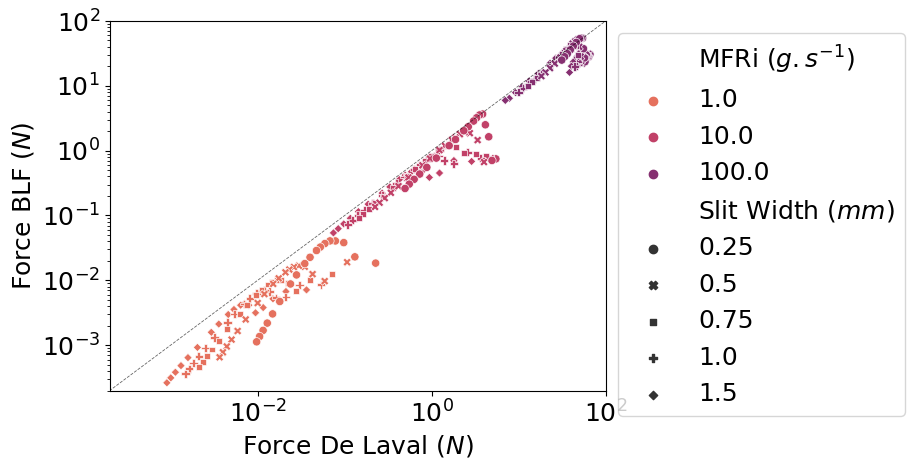

In [10]:
T0 = 288
Cp = 1006.43
gamma = 1.4
df['Force De Laval ($N$)'] = 1e-3*df['MFRi ($g.s^{-1}$)']* np.sqrt(T0*2*Cp*(1-(1e5/(df['Pressure ($Pa$)']+1e5))**((gamma-1)/gamma)))
df['Force BLF ($N$)'] = df['Force ($N$)']

palette = create_log_palette(3, 'flare')
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)
fig = plt.figure()
ax = sns.scatterplot(data=df, x='Force De Laval ($N$)', y='Force BLF ($N$)',
                    hue='MFRi ($g.s^{-1}$)',
                    style='Slit Width ($mm$)',
                    legend=True,
                    palette=palette, 
                    # vmin=1e-3, vmax=1e-1
                    norm=LogNorm(),
                    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, 100], [0, 100], 'k--', linewidth=0.6, alpha=0.6)
plt.yscale('log')
plt.xscale('log')
plt.xlim([2e-4, 100])
plt.ylim([2e-4, 100])

plt.show()
fig.savefig(f'slit_radius_force_efficiency.png', format='png', dpi=300, bbox_inches = 'tight')


0      227.042911
1      106.709898
2       71.987400
3       53.570950
4       36.455253
          ...    
265    312.314267
266    182.147130
267    127.594522
268     99.152605
269     70.074746
Name: Velocity De Laval ($m.s^{-1}$), Length: 270, dtype: float64


/home/guillaume/.local/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


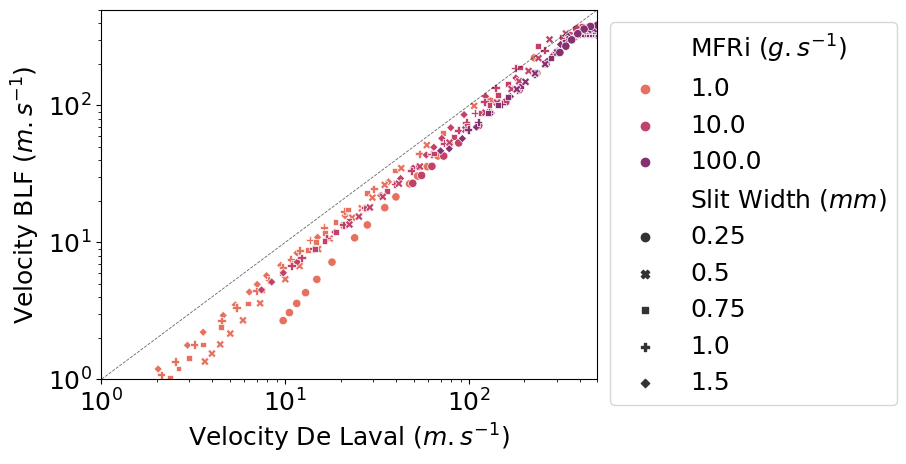

In [14]:
T0 = 288
Cp = 1006.43
gamma = 1.4
df['Velocity De Laval ($m.s^{-1}$)'] = np.sqrt(T0*2*Cp*(1-(1e5/(df['Pressure ($Pa$)']+1e5))**((gamma-1)/gamma)))
df['Velocity BLF ($m.s^{-1}$)'] = df['vmoy_buse [m s^-1]']

print(df['Velocity De Laval ($m.s^{-1}$)'])

palette = create_log_palette(3, 'flare')
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)
fig = plt.figure()
ax = sns.scatterplot(data=df, x='Velocity De Laval ($m.s^{-1}$)', y='Velocity BLF ($m.s^{-1}$)',
                    hue='MFRi ($g.s^{-1}$)',
                    style='Slit Width ($mm$)',
                    legend=True,
                    palette=palette, 
                    # vmin=1e-3, vmax=1e-1
                    norm=LogNorm(),
                    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, 500], [0, 500], 'k--', linewidth=0.6, alpha=0.6)
plt.yscale('log')
plt.xscale('log')
plt.xlim([1, 500])
plt.ylim([1, 500])

plt.show()
fig.savefig(f'slit_radius_force_efficiency_vel.png', format='png', dpi=300, bbox_inches = 'tight')


In [ ]:
print(palette[2])

(0.52386353, 0.18939409, 0.44182449)


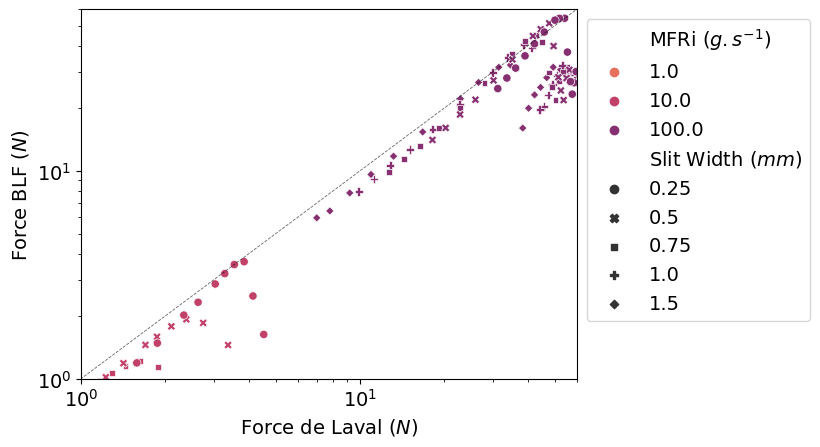

In [ ]:
T0 = 288
Cp = 1006.43
gamma = 1.4
df['Force de Laval ($N$)'] = 1e-3*df['MFRi ($g.s^{-1}$)']* np.sqrt(T0*2*Cp*(1-(1e5/(df['Pressure ($Pa$)']+1e5))**((gamma-1)/gamma)))
df['Force BLF ($N$)'] = df['Force ($N$)']

palette = create_log_palette(3, 'flare')
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)
fig = plt.figure()
ax = sns.scatterplot(data=df, x='Force de Laval ($N$)', y='Force BLF ($N$)',
                    hue='MFRi ($g.s^{-1}$)',
                    style='Slit Width ($mm$)',
                    legend=True,
                    palette=palette, 
                    # vmin=1e-3, vmax=1e-1
                    norm=LogNorm(),
                    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, 100], [0, 100], 'k--', linewidth=0.6, alpha=0.6)
plt.yscale('log')
plt.xscale('log')
plt.xlim([1, 60])
plt.ylim([1, 60])

plt.show()
fig.savefig(f'slit_radius_force_efficiency_zoom.png', format='png', dpi=300, bbox_inches = 'tight')


[(0.280894, 0.078907, 0.402329), (0.28229, 0.145912, 0.46151), (0.270595, 0.214069, 0.507052), (0.250425, 0.27429, 0.533103), (0.223925, 0.334994, 0.548053), (0.19943, 0.387607, 0.554642), (0.175841, 0.44129, 0.557685), (0.15627, 0.489624, 0.557936), (0.136408, 0.541173, 0.554483), (0.121831, 0.589055, 0.545623), (0.12478, 0.640461, 0.527068), (0.162016, 0.687316, 0.499129), (0.239374, 0.735588, 0.455688), (0.335885, 0.777018, 0.402049), (0.458674, 0.816363, 0.329727), (0.585678, 0.846661, 0.249897), (0.730889, 0.871916, 0.156029), (0.866013, 0.889868, 0.095953)]
1


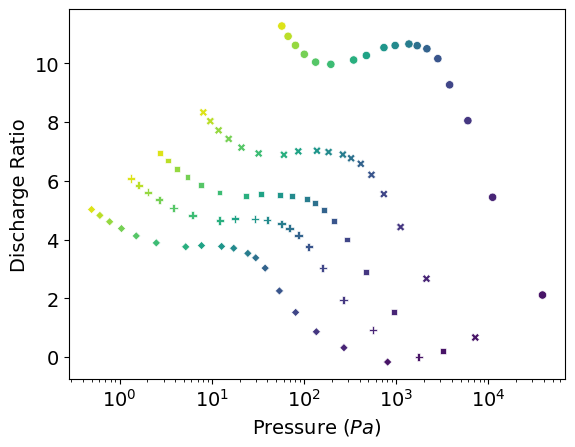

10


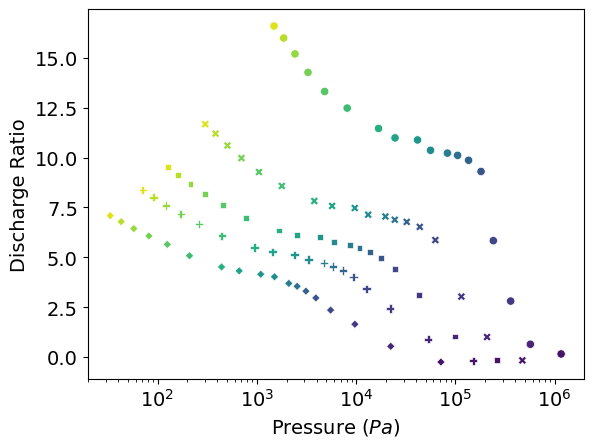

100


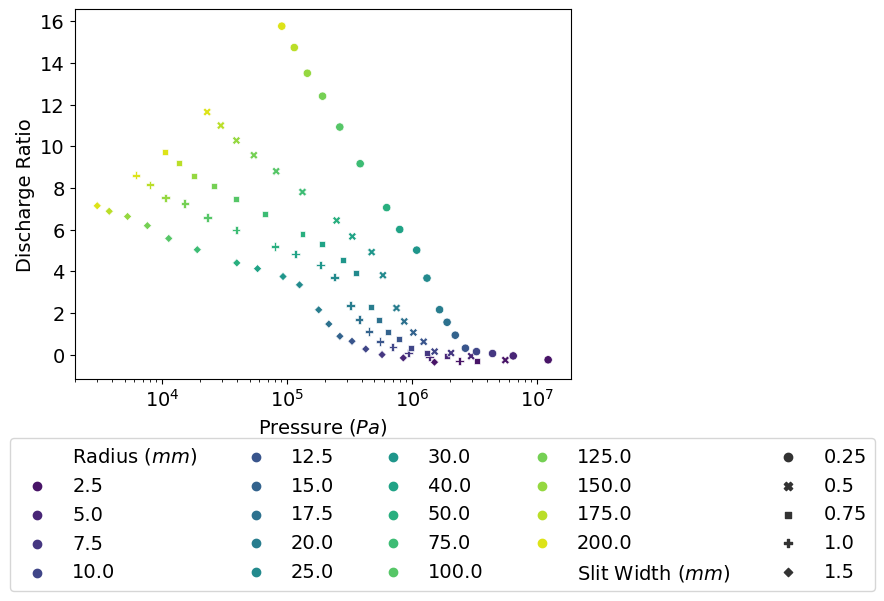

In [ ]:
# Create the palette with logarithmic scale
n_colors = 18
palette = create_log_palette(n_colors, 'viridis')
print(palette)
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)

for i in [1,10,100]:
    fig = plt.figure()
    ax = sns.scatterplot(data=df[df['MFRi ($g.s^{-1}$)'] == i], 
                        x='Pressure ($Pa$)',
                        y='Discharge Ratio',
                        hue='Radius ($mm$)',
                        style='Slit Width ($mm$)',
                        palette=palette, 
                        # vmin=1e-3, vmax=1e-1
                        norm=LogNorm(),
                        )
    # sns.move_legend(ax, "lower right")
    sns.move_legend(ax, "lower left", bbox_to_anchor=(-0.15, -0.6), ncol=5)
    print(i)
    if i==1 or i==10:
        plt.legend('',frameon=False)
    plt.xscale('log')
    plt.show()
    fig.savefig(f'slit_radius_DR_{i}_efficiency.png', format='png', dpi=300, bbox_inches = 'tight')


In [ ]:
idx = df.groupby(['MFRi ($g.s^{-1}$)', 'Slit Width ($mm$)'] )['Force ($N$)'].transform(max) == df['Force ($N$)']
df[idx]['Force ($N$)']
df[idx][['MFRi ($g.s^{-1}$)','Slit Width ($mm$)','Force ($N$)']]


MFRi ($g.s^{-1}$)  Slit Width ($mm$)  Force ($N$)
1                  1.0               0.50     0.019020
2                  1.0               0.75     0.012421
3                  1.0               1.00     0.008550
4                  1.0               1.50     0.007125
20                 1.0               0.25     0.040544
98                10.0               1.00     0.944045
99                10.0               1.50     0.703296
110               10.0               0.25     3.659477
111               10.0               0.50     1.933167
112               10.0               0.75     1.213019
224              100.0               1.50    32.355221
225              100.0               0.25    54.274572
226              100.0               0.50    51.361718
227              100.0               0.75    45.282662
228              100.0               1.00    40.524327

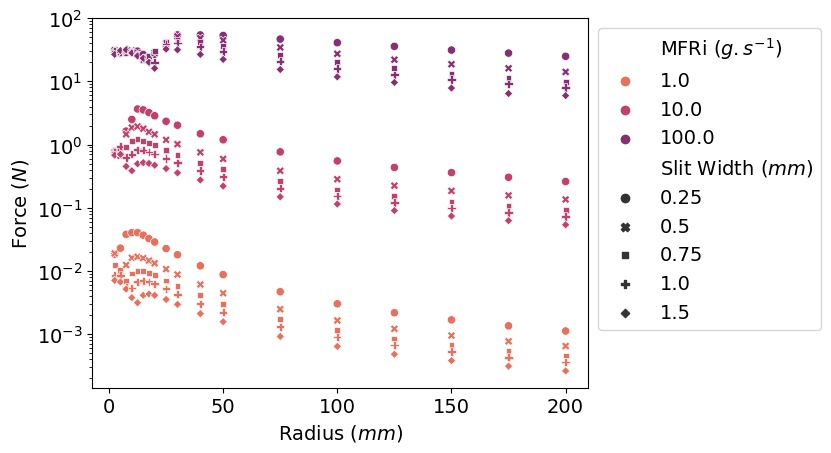

In [ ]:
plt.rcParams.update({'font.size': 14})

plot_force('slit_radius', df)

#### Parameters generation

[(0.267968, 0.223549, 0.512008), (0.190631, 0.407061, 0.556089), (0.127568, 0.566949, 0.550556), (0.20803, 0.718701, 0.472873), (0.565498, 0.84243, 0.262877)]
1


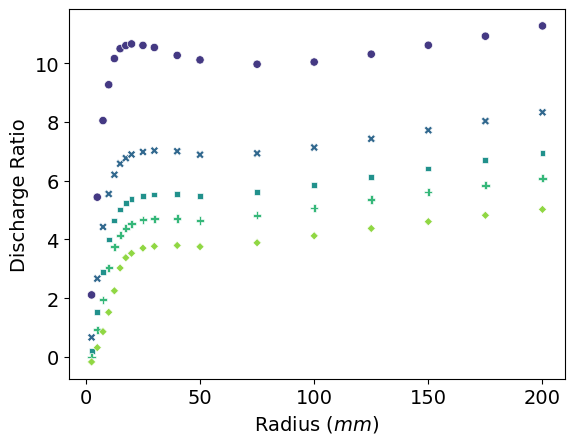

10


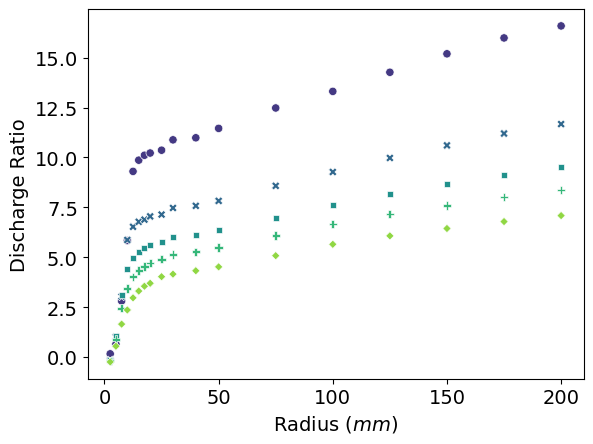

100


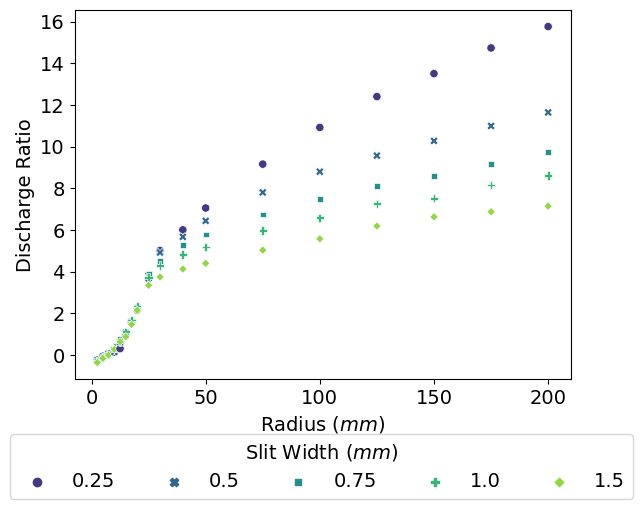

In [ ]:
# Create the palette with logarithmic scale
n_colors =5
palette = create_log_palette(n_colors, 'viridis')
print(palette)
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)

for i in [1,10,100]:
    fig = plt.figure()
    ax = sns.scatterplot(data=df[df['MFRi ($g.s^{-1}$)'] == i], 
                        x='Radius ($mm$)',
                        y='Discharge Ratio',
                        hue='Slit Width ($mm$)',
                        style='Slit Width ($mm$)',
                        palette=palette, 
                        # vmin=1e-3, vmax=1e-1
                        norm=LogNorm(),
                        )
    # sns.move_legend(ax, "lower right")
    sns.move_legend(ax, "lower left", bbox_to_anchor=(-0.15, -0.35), ncol=5)
    print(i)
    if i==1 or i==10:
        plt.legend('',frameon=False)
    plt.show()
    fig.savefig(f'slit_radius_DR_{i}.png', format='png', dpi=300, bbox_inches = 'tight')


#### Tail Tickness

In [ ]:
dfT = pd.read_csv('./tail.csv', sep='\t', decimal=',')


dfT.rename(
    columns={
        'mass_flow_inlet': 'MFRi ($g.s^{-1}$)', 
        'SlitOut':'Slit Width ($mm$)', 
        'Force':'Force ($N$)', 
        'Radius':'Radius ($mm$)',
        'MFR_Center': 'MFR_Center ($g.s^{-1}$)',
        'Tail': 'Tail ($mm$)'},
    inplace=True)
dfT['Tail ($mm$)']=25-dfT['Tail ($mm$)']
dfT['MFRi ($g.s^{-1}$)']=dfT['MFRi ($g.s^{-1}$)']*1000
dfT['MFR_Center ($g.s^{-1}$)']=dfT['MFR_Center ($g.s^{-1}$)']*1000
# df.rename(columns={'mass_flow_inlet': 'MFRi ($kg.s^{-1}$)', 'OutletEndThickness':'Slit Width ($mm$)', 'Force':'Force ($N$)', 'Radius':'Radius ($mm$)'}, inplace=True)
dfT['Discharge Ratio']=(np.abs(dfT['MFR_Center ($g.s^{-1}$)'])-dfT['MFRi ($g.s^{-1}$)'])/dfT['MFRi ($g.s^{-1}$)']
dfT.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MFRi ($g.s^{-1}$)        176 non-null    float64
 1   OutLetStartThickness     176 non-null    float64
 2   Radius ($mm$)            176 non-null    int64  
 3   Slit Width ($mm$)        176 non-null    float64
 4   SlitPosition             176 non-null    int64  
 5   paroi Element Size       176 non-null    float64
 6   interieur Element Size   176 non-null    float64
 7   centre Element Size      176 non-null    float64
 8   autour Element Size      176 non-null    float64
 9   y_scale                  176 non-null    int64  
 10  x_scale                  176 non-null    int64  
 11  translate                176 non-null    float64
 12  SlitIn                   176 non-null    float64
 13  Tail ($mm$)              176 non-null    float64
 14  Force ($N$)              1

##### Tail Force

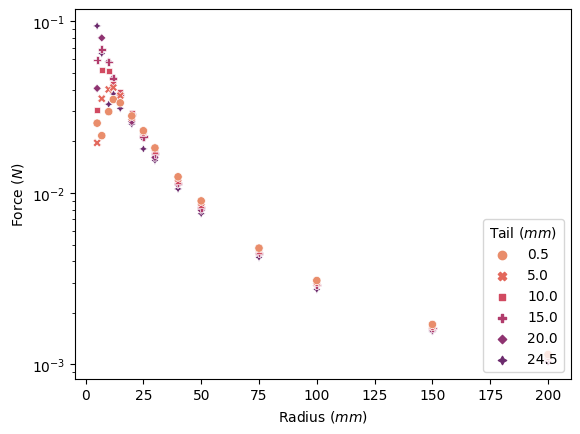

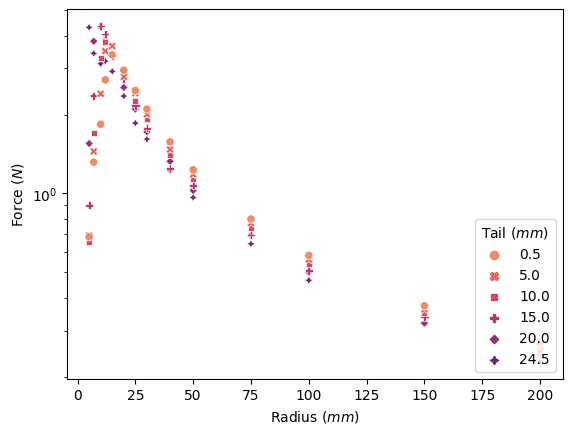

In [ ]:
plot_simple('tail_force_1',
                dfT[(dfT['MFRi ($g.s^{-1}$)'] == 1)],
                'Radius ($mm$)',
                'Force ($N$)',
                6,
                'flare',
                hue = 'Tail ($mm$)',
                style = 'Tail ($mm$)',
                log=True
                )

plot_simple('tail_force_10',
                dfT[(dfT['MFRi ($g.s^{-1}$)'] == 10)],
                'Radius ($mm$)',
                'Force ($N$)',
                6,
                'flare',
                hue = 'Tail ($mm$)',
                style = 'Tail ($mm$)',
                log=True
                )

##### Tail Discharge Ratio

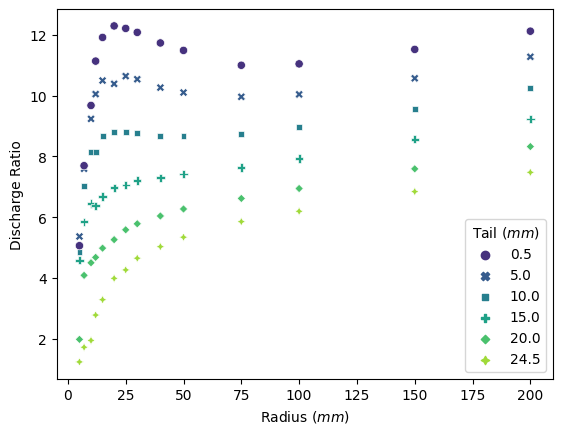

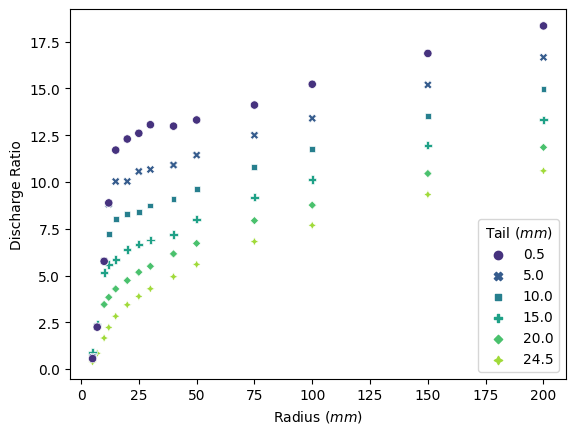

In [ ]:
plot_simple('tail_dr_1',
                dfT[(dfT['MFRi ($g.s^{-1}$)'] == 1)],
                'Radius ($mm$)',
                'Discharge Ratio',
                6,
                'viridis',
                hue = 'Tail ($mm$)',
                style = 'Tail ($mm$)',
                log=False
                )

plot_simple('tail_dr_10',
                dfT[(dfT['MFRi ($g.s^{-1}$)'] == 10)],
                'Radius ($mm$)',
                'Discharge Ratio',
                6,
                'viridis',
                hue = 'Tail ($mm$)',
                style = 'Tail ($mm$)',
                log=False
                )

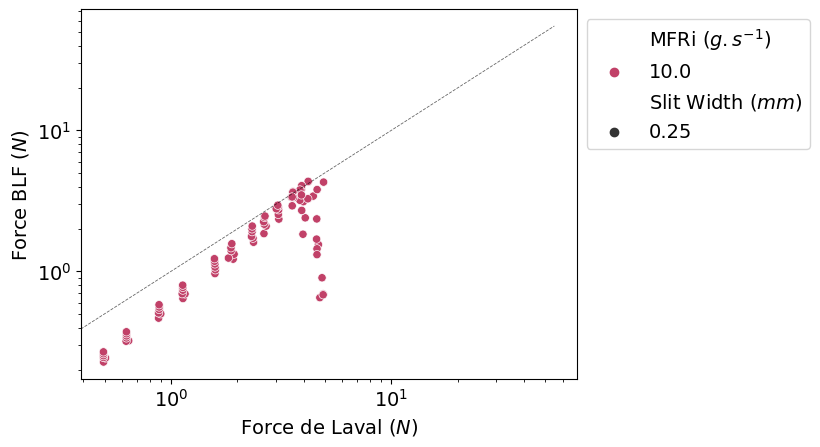

In [ ]:
T0 = 288
Cp = 1006.43
gamma = 1.4
dfT['Force de Laval ($N$)'] = 1e-3*dfT['MFRi ($g.s^{-1}$)']* np.sqrt(T0*2*Cp*(1-(1e5/(dfT['Static_P_Max']+1e5))**((gamma-1)/gamma)))
dfT['Force BLF ($N$)'] = dfT['Force ($N$)']

palette = create_log_palette(1, 'flare')
# palette = sns.cubehelix_palette(as_cmap=True, gamma=0.5)
fig = plt.figure()
ax = sns.scatterplot(data=dfT[dfT['MFRi ($g.s^{-1}$)']==10], x='Force de Laval ($N$)', y='Force BLF ($N$)',
                    hue='MFRi ($g.s^{-1}$)',
                    style='Slit Width ($mm$)',
                    legend=True,
                    palette=palette, 
                    # vmin=1e-3, vmax=1e-1
                    norm=LogNorm(),
                    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, 55], [0, 55], 'k--', linewidth=0.6, alpha=0.6)
plt.yscale('log')
plt.xscale('log')
plt.show()
fig.savefig(f'tail_force_efficiency.png', format='png', dpi=300, bbox_inches = 'tight')


### Slit Position

In [ ]:
dfS = pd.read_csv('./nozzle_location.csv', sep=';', decimal=',')
# dfS.info()

dfS.rename(
    columns={
        'mass_flow_inlet': 'MFRi ($g.s^{-1}$)', 
        'SlitOut':'Slit Width ($mm$)', 
        'Force':'Force ($N$)', 
        'Radius':'Radius ($mm$)',
        'MFR_Center': 'MFR_Center ($g.s^{-1}$)',
        'SlitPosition': 'Position ($mm$)'},
    inplace=True)
dfS['MFRi ($g.s^{-1}$)']=dfS['MFRi ($g.s^{-1}$)']*1000
dfS['MFR_Center ($g.s^{-1}$)']=dfS['MFR_Center ($g.s^{-1}$)']*1000
# df.rename(columns={'mass_flow_inlet': 'MFRi ($kg.s^{-1}$)', 'OutletEndThickness':'Slit Width ($mm$)', 'Force':'Force ($N$)', 'Radius':'Radius ($mm$)'}, inplace=True)
dfS['Discharge Ratio']=(np.abs(dfS[dfS['Position ($mm$)']!=29.7]['MFR_Center ($g.s^{-1}$)'])-dfS[dfS['Position ($mm$)']!=29.7]['MFRi ($g.s^{-1}$)'])/dfS[dfS['Position ($mm$)']!=29.7]['MFRi ($g.s^{-1}$)']
print(dfS['Discharge Ratio'].max())
dfS.info()

13.532885000000002
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     107 non-null    object 
 1   MFRi ($g.s^{-1}$)        120 non-null    float64
 2   OutLetStartThickness     120 non-null    float64
 3   Radius ($mm$)            120 non-null    int64  
 4   Slit Width ($mm$)        120 non-null    float64
 5   SlitIn                   120 non-null    float64
 6   Position ($mm$)          120 non-null    float64
 7   Slit_ecarteur            107 non-null    float64
 8   Force ($N$)              120 non-null    float64
 9   vmoy-centre-op           120 non-null    float64
 10  vmoy-sortie-op           120 non-null    float64
 11  Static_P_Max             120 non-null    float64
 12  Static_P_min             120 non-null    float64
 13  vmax-sortie-op           120 non-null    float64
 14  vmax-ce

In [ ]:

# Affiche la ligne ayant le maximum de force
idx = dfS.groupby(['Position ($mm$)'])['Force ($N$)'].transform(max) == dfS['Force ($N$)']
dfS[idx].head(10)


Name  MFRi ($g.s^{-1}$)  OutLetStartThickness  Radius ($mm$)  \
0     DP 51               10.0                  0.50            100   
1     DP 62               10.0                  0.50            100   
2     DP 73               10.0                  0.50            100   
3     DP 84               10.0                  0.50            100   
4     DP 95               10.0                  0.50            100   
5    DP 106               10.0                  0.50            100   
6    DP 117               10.0                  0.50            100   
7    DP 129               10.0                  0.50            100   
8    DP 141               10.0                  0.50            100   
119     NaN               10.0                  0.25             75   

     Slit Width ($mm$)  SlitIn  Position ($mm$)  Slit_ecarteur  Force ($N$)  \
0                 0.25    0.50              0.5           0.45     0.400856   
1                 0.25    0.50              1.0           0.90     0.413445   
2                 0.25    0.50              2.0           1.90     0.467743   
3                 0.25    0.50              5.0           2.00     0.509231   
4                 0.25    0.50              7.5           3.50     0.514042   
5                 0.25    0.50             10.0           5.00     0.510285   
6                 0.25    0.50             15.0           5.00     0.501286   
7                 0.25    0.50             20.0          15.00     0.518459   
8                 0.25    0.50             25.0          20.00     0.511872   
119               0.25    0.25             29.7            NaN     0.755541   

     vmoy-centre-op  ...  Static_P_min  vmax-sortie-op  vmax-centre-op  \
0          3.612410  ...   -153.898360        9.339912       19.767139   
1          3.667370  ...   -186.049090        9.576615       20.468264   
2          3.685448  ...   -168.066930        9.889172       22.641016   
3          3.867909  ...   -136.439700       10.429948       23.277861   
4          3.871979  ...   -149.267460       10.613656       24.368195   
5          3.845795  ...   -164.263900       10.708407       25.294287   
6          3.809480  ...   -212.150070       11.055161       27.210445   
7          3.982362  ...    -95.464821       11.435318       27.127876   
8          3.932731  ...   -111.399700       11.739861       27.574532   
119        6.185745  ...  -3641.956300       15.619686        9.088659   

       vmax-all   MFR_Out  MFR_Center ($g.s^{-1}$)  Unnamed: 18  Aire_sortie  \
0     55.443581 -0.323462                133.36893          NaN     0.044863   
1     56.934929 -0.329086                135.35609          NaN     0.044863   
2     62.463623 -0.335025                136.01388          NaN     0.044863   
3     69.662643 -0.350241                142.52007          NaN     0.044863   
4     70.748451 -0.352757                142.54518          NaN     0.044863   
5     71.522606 -0.352680                141.43873          NaN     0.044863   
6     82.116898 -0.355345                139.87699          NaN     0.044863   
7     72.789902 -0.363536                145.32885          NaN     0.044863   
8     77.469772 -0.365353                143.18430          NaN     0.044863   
119  138.309190 -0.367656                128.62507          NaN          NaN   

     Force_sortie  Discharge Ratio  
0        0.396851        13.336893  
1        0.408704        13.535609  
2        0.418350        13.601388  
3        0.458625        14.252007  
4        0.462732        14.254518  
5        0.460053        14.143873  
6        0.461722        13.987699  
7        0.492961        14.532885  
8        0.494075        14.318430  
119           NaN        12.862507  

[10 rows x 22 columns]

In [ ]:
# Affiche la ligne ayant le maximum de DR
idx = dfS.groupby(['Position ($mm$)'])['Discharge Ratio'].transform(max) == dfS['Discharge Ratio']
dfS[idx].head(10)

Name  MFRi ($g.s^{-1}$)  OutLetStartThickness  Radius ($mm$)  \
0     DP 51               10.0                  0.50            100   
1     DP 62               10.0                  0.50            100   
2     DP 73               10.0                  0.50            100   
3     DP 84               10.0                  0.50            100   
4     DP 95               10.0                  0.50            100   
5    DP 106               10.0                  0.50            100   
6    DP 117               10.0                  0.50            100   
7    DP 129               10.0                  0.50            100   
8    DP 141               10.0                  0.50            100   
119     NaN               10.0                  0.25             75   

     Slit Width ($mm$)  SlitIn  Position ($mm$)  Slit_ecarteur  Force ($N$)  \
0                 0.25    0.50              0.5           0.45     0.400856   
1                 0.25    0.50              1.0           0.90     0.413445   
2                 0.25    0.50              2.0           1.90     0.467743   
3                 0.25    0.50              5.0           2.00     0.509231   
4                 0.25    0.50              7.5           3.50     0.514042   
5                 0.25    0.50             10.0           5.00     0.510285   
6                 0.25    0.50             15.0           5.00     0.501286   
7                 0.25    0.50             20.0          15.00     0.518459   
8                 0.25    0.50             25.0          20.00     0.511872   
119               0.25    0.25             29.7            NaN     0.755541   

     vmoy-centre-op  ...  Static_P_min  vmax-sortie-op  vmax-centre-op  \
0          3.612410  ...   -153.898360        9.339912       19.767139   
1          3.667370  ...   -186.049090        9.576615       20.468264   
2          3.685448  ...   -168.066930        9.889172       22.641016   
3          3.867909  ...   -136.439700       10.429948       23.277861   
4          3.871979  ...   -149.267460       10.613656       24.368195   
5          3.845795  ...   -164.263900       10.708407       25.294287   
6          3.809480  ...   -212.150070       11.055161       27.210445   
7          3.982362  ...    -95.464821       11.435318       27.127876   
8          3.932731  ...   -111.399700       11.739861       27.574532   
119        6.185745  ...  -3641.956300       15.619686        9.088659   

       vmax-all   MFR_Out  MFR_Center ($g.s^{-1}$)  Unnamed: 18  Aire_sortie  \
0     55.443581 -0.323462                133.36893          NaN     0.044863   
1     56.934929 -0.329086                135.35609          NaN     0.044863   
2     62.463623 -0.335025                136.01388          NaN     0.044863   
3     69.662643 -0.350241                142.52007          NaN     0.044863   
4     70.748451 -0.352757                142.54518          NaN     0.044863   
5     71.522606 -0.352680                141.43873          NaN     0.044863   
6     82.116898 -0.355345                139.87699          NaN     0.044863   
7     72.789902 -0.363536                145.32885          NaN     0.044863   
8     77.469772 -0.365353                143.18430          NaN     0.044863   
119  138.309190 -0.367656                128.62507          NaN          NaN   

     Force_sortie  Discharge Ratio  
0        0.396851        13.336893  
1        0.408704        13.535609  
2        0.418350        13.601388  
3        0.458625        14.252007  
4        0.462732        14.254518  
5        0.460053        14.143873  
6        0.461722        13.987699  
7        0.492961        14.532885  
8        0.494075        14.318430  
119           NaN        12.862507  

[10 rows x 22 columns]

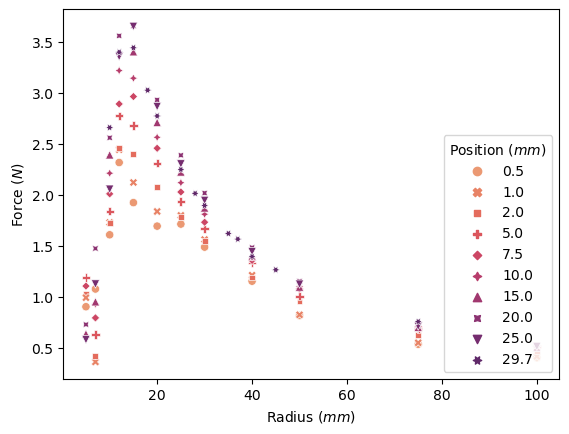

In [ ]:
plot_simple('position_force_10',
                dfS[(dfS['MFRi ($g.s^{-1}$)'] == 10)],
                'Radius ($mm$)',
                'Force ($N$)',
                10,
                'flare',
                hue = 'Position ($mm$)',
                style = 'Position ($mm$)',
                log=False
                )

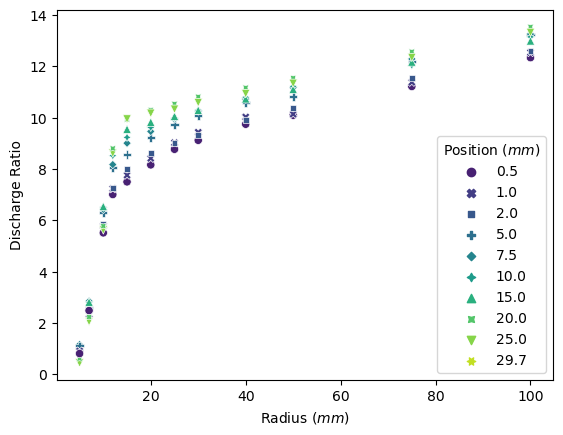

In [ ]:
plot_simple('position_dr_10',
                dfS[(dfS['MFRi ($g.s^{-1}$)'] == 10)],
                'Radius ($mm$)',
                'Discharge Ratio',
                10,
                'viridis',
                hue = 'Position ($mm$)',
                style = 'Position ($mm$)',
                log=False
                )

#### Parameters

In [ ]:
radii = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 25, 30, 40, 50, 75 ,100, 125, 150, 175, 200, 250]
slit = [0.25, 0.5, 0.75, 1, 1.5]
mfr = [0.001, 0.01, 0.1]

parameters = []

for m in mfr:
    for r in radii:
        for s in slit:
            parameters.append([m, r, s, s])
        
pd.DataFrame(parameters, columns=['MFR', 'Radius ($mm$)', 'Slit In ($mm$)', 'Slit Out ($mm$)']).to_csv('./param_radii_slit.csv', sep=';', decimal=',', index=False)